## Import the libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os


## Reading Data

In [2]:
df = pd.read_csv('Iris.csv')

# Data Analysis

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Data Visulization

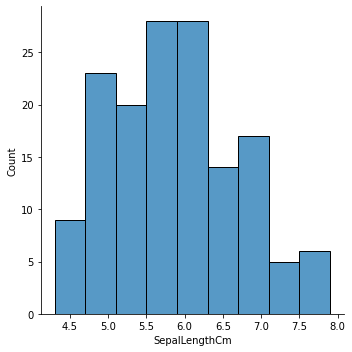

In [6]:
sns.displot(df['SepalLengthCm'])

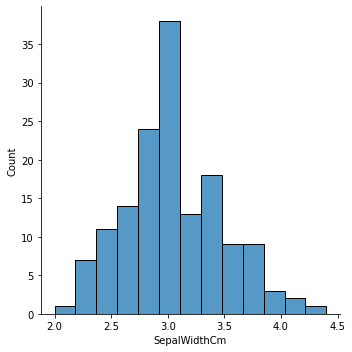

In [7]:
sns.displot(df['SepalWidthCm'])

In [8]:
Q1 = df['SepalWidthCm'].quantile(0.25)
Q3 = df['SepalWidthCm'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 


df.loc[df['SepalWidthCm'] < Q1 - 1.5 * IQR, 'SepalWidthCm'] = Q1 - 1.5 * IQR
df.loc[df['SepalWidthCm'] > Q3 + 1.5 * IQR, 'SepalWidthCm'] = Q3 + 1.5 * IQR


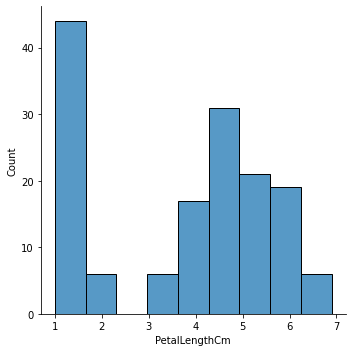

In [9]:
sns.displot(df['PetalLengthCm'])

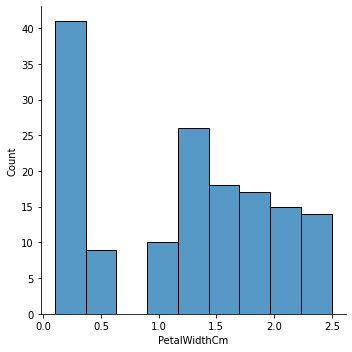

In [10]:
sns.displot(data=df['PetalWidthCm'])


<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

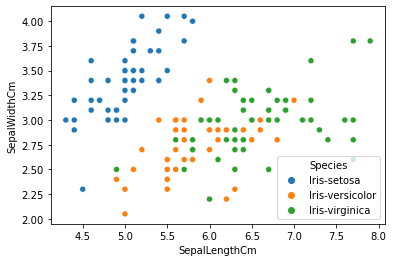

In [11]:
sns.scatterplot(data = df , x = 'SepalLengthCm', y = 'SepalWidthCm' , hue = 'Species')

<AxesSubplot:xlabel='PetalLengthCm', ylabel='SepalWidthCm'>

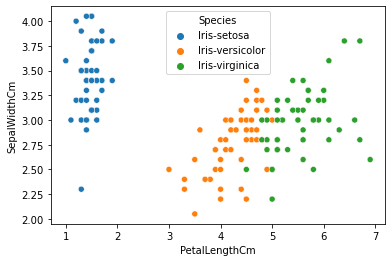

In [12]:
sns.scatterplot(data = df , x = 'PetalLengthCm', y = 'SepalWidthCm' , hue = 'Species')

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

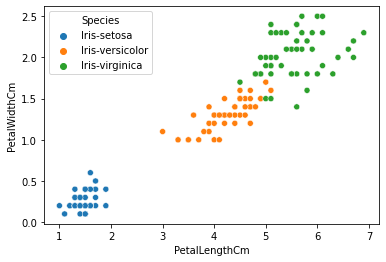

In [13]:
sns.scatterplot(data = df , x = 'PetalLengthCm', y = 'PetalWidthCm' , hue = 'Species')

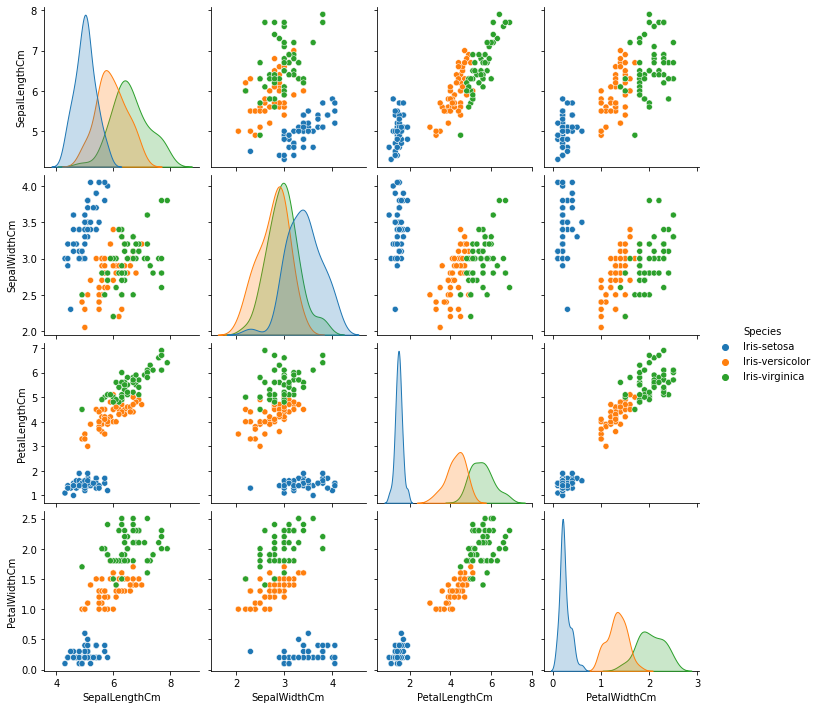

In [14]:
sns.pairplot(data=df.drop(columns='Id'), hue='Species')


## Training and Testing Data 

In [15]:
x = df.drop(columns=['Id', 'Species'])


In [16]:
y = df['Species']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.30, 
                                                    random_state=101)

## Model Training

### KNN Classification

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

KNeighborsClassifier()

In [19]:
y_pred_knn = knn.predict(X_test)

### Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter = 1000 )
logmodel.fit(X_train,y_train)


LogisticRegression(max_iter=1000)

In [21]:
y_pred_logmodel = logmodel.predict(X_test)

## Model Accuracy

### KNN Classification

In [22]:
from sklearn.metrics import accuracy_score
score_knn = accuracy_score(y_pred_knn,y_test)
score_knn

1.0

### Logistic Regression

In [23]:
from sklearn.metrics import accuracy_score
score_logmodel = accuracy_score(y_pred_logmodel,y_test)
score_logmodel

0.9777777777777777